1.Import data

In [1]:
import pandas as pd

In [16]:
df=pd.read_csv('training_set.csv')

In [17]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [18]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

2.NULL Treatment

In [19]:
df.isna().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [20]:
for i in df.columns:
    a = df[i].isna().sum()
    if a < 600 and df[i].dtype == 'object':
        df[i] = df[i].fillna(df[i].mode()[0])
    elif a < 600 and df[i].dtype != 'object':
        df[i] = df[i].fillna(df[i].mean())
    else:
        df.drop(columns=i, inplace=True)

In [21]:
df.isna().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


3.EDA

In [22]:
con=[]
cat=[]

for i in df.columns:
    if df[i].dtypes== object:
        cat.append(i)
    else:
        con.append(i)

In [23]:
con

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [24]:
cat

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

4. Correlation Between Variable

In [25]:
df[con].corr()['SalePrice'].sort_values(ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


5.droping less correlated columns

In [26]:
c=['MoSold','3SsnPorch','BsmtFinSF2','BsmtHalfBath','MiscVal','Id','LowQualFinSF','YrSold','SalePrice']

In [27]:
X=df.drop(labels=c,axis=1)
Y=df[['SalePrice']]

In [28]:
con=[]
cat=[]

for i in X:
    if X[i].dtypes==object:
        cat.append(i)
    else:
        con.append(i)

In [29]:
Xcat=X[cat]
Xcon=X[con]

# 6.Data Preprocessing

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le=LabelEncoder()

In [32]:
from warnings import filterwarnings
filterwarnings('ignore')

In [33]:
for i in Xcat.columns:
    Xcat[i]=le.fit_transform(X[i])

In [34]:
Xcat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,4,3,6,1,1,4,4,2,8,4
1456,3,1,3,3,0,4,0,14,2,2,...,4,3,2,1,2,4,4,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,...,4,2,6,1,1,4,4,2,8,4
1458,3,1,3,3,0,4,0,12,2,2,...,0,2,6,1,2,4,4,2,8,4


# 7.Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
ss=StandardScaler()

In [37]:
Xcon=pd.DataFrame(ss.fit_transform(Xcon),columns=con)

In [38]:
Xcon

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.944591,...,0.912210,-0.951226,1.021157,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.270208,-0.068692
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.641228,...,-0.318683,0.600495,-0.104483,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.270208,-0.068692
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.301643,...,-0.318683,0.600495,0.937776,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.270208,-0.068692
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.061670,...,0.296763,0.600495,0.812705,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.270208,-0.068692
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.174865,...,1.527656,0.600495,0.896086,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.270208,-0.068692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,-0.973018,0.873321,...,0.296763,0.600495,0.854395,0.311725,-0.060731,-0.752176,-0.100558,-0.359325,-0.270208,-0.068692
1456,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.759659,0.049262,...,0.296763,2.152216,-0.021102,0.311725,0.126420,2.033231,-0.704483,-0.359325,-0.270208,-0.068692
1457,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-0.369871,0.701265,...,1.527656,2.152216,-1.563645,-1.026858,-1.033914,-0.752176,0.201405,-0.359325,-0.270208,-0.068692
1458,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,-0.865548,-1.284176,...,-0.934130,-0.951226,-1.188432,-1.026858,-1.090059,2.168910,-0.704483,1.473789,-0.270208,-0.068692


# 8.Join

In [39]:
X=Xcon.join(Xcat)

In [40]:
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.944591,...,4,2,6,1,1,4,4,2,8,4
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.641228,...,4,3,6,1,1,4,4,2,8,4
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.301643,...,4,2,6,1,1,4,4,2,8,4
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.061670,...,4,2,6,5,2,4,4,2,8,0
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.174865,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,-0.973018,0.873321,...,4,3,6,1,1,4,4,2,8,4
1456,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.759659,0.049262,...,4,3,2,1,2,4,4,2,8,4
1457,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-0.369871,0.701265,...,4,2,6,1,1,4,4,2,8,4
1458,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,-0.865548,-1.284176,...,0,2,6,1,2,4,4,2,8,4


# 8.Outlier Treatment

In [41]:
out=[]
for i in Xcon.columns:
    ol=Xcon[(Xcon[i]>3)|(Xcon[i]<-3)].index
    out.extend(ol)

In [42]:
out

[9,
 48,
 93,
 125,
 165,
 246,
 291,
 300,
 312,
 335,
 411,
 488,
 520,
 535,
 635,
 637,
 703,
 705,
 713,
 861,
 969,
 985,
 1030,
 1062,
 1144,
 1186,
 1190,
 1266,
 1393,
 1416,
 171,
 197,
 231,
 277,
 313,
 446,
 807,
 909,
 934,
 1107,
 1127,
 1173,
 1182,
 1211,
 1298,
 1337,
 53,
 249,
 313,
 335,
 384,
 451,
 457,
 661,
 706,
 769,
 848,
 1298,
 1396,
 375,
 533,
 88,
 185,
 191,
 218,
 241,
 250,
 304,
 375,
 378,
 398,
 461,
 508,
 519,
 583,
 676,
 703,
 726,
 745,
 980,
 991,
 1123,
 1149,
 1213,
 1268,
 1327,
 1352,
 1435,
 1457,
 304,
 630,
 747,
 1132,
 1137,
 1349,
 37,
 58,
 70,
 105,
 115,
 161,
 169,
 178,
 224,
 297,
 349,
 403,
 477,
 517,
 523,
 654,
 691,
 718,
 755,
 763,
 798,
 808,
 825,
 898,
 981,
 1111,
 1169,
 1228,
 1289,
 1298,
 1373,
 1417,
 70,
 178,
 523,
 898,
 1182,
 1298,
 137,
 224,
 278,
 477,
 496,
 581,
 678,
 774,
 798,
 932,
 1267,
 224,
 332,
 440,
 496,
 523,
 691,
 1044,
 1182,
 1298,
 1373,
 224,
 440,
 496,
 523,
 529,
 691,
 898,
 1

In [43]:
outliers=list(set(out))

In [44]:
outliers

[3,
 7,
 8,
 9,
 17,
 28,
 37,
 39,
 46,
 48,
 53,
 58,
 64,
 70,
 72,
 74,
 78,
 80,
 88,
 93,
 102,
 104,
 105,
 115,
 118,
 125,
 137,
 144,
 154,
 161,
 165,
 166,
 169,
 171,
 176,
 178,
 185,
 188,
 189,
 191,
 196,
 197,
 218,
 224,
 231,
 241,
 246,
 249,
 250,
 260,
 277,
 278,
 289,
 291,
 293,
 297,
 298,
 300,
 304,
 306,
 309,
 312,
 313,
 314,
 325,
 326,
 328,
 330,
 332,
 335,
 339,
 342,
 343,
 349,
 351,
 357,
 358,
 359,
 360,
 365,
 366,
 375,
 378,
 380,
 384,
 398,
 400,
 403,
 411,
 420,
 426,
 440,
 441,
 446,
 451,
 454,
 457,
 459,
 461,
 462,
 471,
 475,
 477,
 480,
 488,
 495,
 496,
 499,
 505,
 508,
 517,
 519,
 520,
 523,
 529,
 533,
 535,
 550,
 570,
 577,
 581,
 583,
 588,
 591,
 597,
 605,
 608,
 618,
 624,
 625,
 628,
 630,
 634,
 635,
 637,
 642,
 645,
 647,
 648,
 653,
 654,
 660,
 661,
 662,
 664,
 666,
 673,
 676,
 678,
 691,
 703,
 705,
 706,
 713,
 718,
 720,
 726,
 728,
 735,
 736,
 738,
 745,
 747,
 755,
 763,
 764,
 769,
 774,
 775,
 778,
 784

In [45]:
X=X.drop(index=outliers,axis=0)
Y=Y.drop(index=outliers,axis=0)

In [46]:
#reindexing
X.index=range(0,X.shape[0])
Y.index=range(0,Y.shape[0])

# 9.Divide training and testing data

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2, random_state=42)

# 10.model building

*1.Linear Regression*

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr=LinearRegression()

In [51]:
model=lr.fit(xtrain,ytrain)

**11.Prediction**

In [52]:
pred=model.predict(xtest)

In [53]:
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

In [54]:
from sklearn.metrics import mean_absolute_error,r2_score

In [55]:
tr_score=r2_score(tr_pred,ytrain)
ts_score=r2_score(ts_pred,ytest)

In [56]:
print(tr_score)
print(ts_score) #overfitting is there

0.9009512317624727
0.8725656797424496


In [57]:
error=mean_absolute_error(pred,ytest)
error

16731.182294848903

# **Overfitting**

In [58]:
from sklearn.linear_model import Ridge

In [59]:
import numpy as np

In [60]:
w=[]
e=0.01
for i in range(0,1000,1):
    w.append(e)
    e=round(e+0.01,2)

In [61]:
w

[0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.82,
 0.83,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.94,
 0.95,
 0.96,
 0.97,
 0.98,
 0.99,
 1.0,
 1.01,
 1.02,
 1.03,
 1.04,
 1.05,
 1.06,
 1.07,
 1.08,
 1.09,
 1.1,
 1.11,
 1.12,
 1.13,
 1.14,
 1.15,
 1.16,
 1.17,
 1.18,
 1.19,
 1.2,
 1.21,
 1.22,
 1.23,
 1.24,
 1.25,
 1.26,
 1.27,
 1.28,
 1.29,
 1.3,
 1.31,
 1.32,
 1.33,
 1.34,
 1.35,
 1.36,
 1.37,
 1.38,
 1.39,
 1.4,
 1.41,
 1.42,
 1.43,
 1.44,
 1.45,

Gridsearchcv

In [62]:
rr=Ridge()
hp={'alpha':w,'random_state':np.arange(1,40)} # hyper parameters

from sklearn.model_selection import GridSearchCV

cv=GridSearchCV(rr,hp,scoring='neg_mean_squared_error',cv=4)
cvmodel=cv.fit(X,Y)


In [63]:
cvmodel.best_params_

{'alpha': 10.0, 'random_state': 1}

In [64]:
rr=Ridge(alpha=10.0,random_state=1)
model=rr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)


tr_score=r2_score(ytrain,tr_pred)
ts_score=r2_score(ytest,ts_pred)

print('training score',tr_score)
print('testing score',ts_score)

training score 0.9085038550529999
testing score 0.8744198179179636


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

lr = LinearRegression()
dtr=DecisionTreeRegressor()
rf=RandomForestRegressor(n_estimators=20)
ad= AdaBoostRegressor(n_estimators=5)
knr=KNeighborsRegressor(n_neighbors=3)
svr=SVR(kernel='linear')

alg=[lr,dtr,rf,ad,knr,svr]

for i in alg:
    model=i.fit(xtrain,ytrain)
    ts_pred=model.predict(xtest)
    tr_pred=model.predict(xtrain)
    tr_score=r2_score(tr_pred,ytrain)
    ts_score=r2_score(ts_pred,ytest)
    print(i)
    print('training score : ',tr_score)
    print('testing score : ',ts_score)
    print('*******************************')

LinearRegression()
training score :  0.9009512317624727
testing score :  0.8725656797424496
*******************************
DecisionTreeRegressor()
training score :  0.9999930048823978
testing score :  0.7453657286813877
*******************************
RandomForestRegressor(n_estimators=20)
training score :  0.9771141426789861
testing score :  0.8395065295385741
*******************************
AdaBoostRegressor(n_estimators=5)
training score :  0.8101303999353151
testing score :  0.7284536836910491
*******************************
KNeighborsRegressor(n_neighbors=3)
training score :  0.8672476941293357
testing score :  0.6830431457876645
*******************************
SVR(kernel='linear')
training score :  -51.664513180946045
testing score :  -46.33128987193702
*******************************


Apply Grid Search on random forest

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score


param_grid = {
    'n_estimators': [5, 10, 20],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
}

rf = RandomForestRegressor()


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(xtrain, ytrain)

best_rf = grid_search.best_estimator_


ts_pred = best_rf.predict(xtest)
tr_pred = best_rf.predict(xtrain)


tr_score = r2_score(tr_pred, ytrain)
ts_score = r2_score(ts_pred, ytest)


print(best_rf)
print('Training score: ', tr_score)
print('Testing score: ', ts_score)

RandomForestRegressor(min_samples_split=5, n_estimators=20)
Training score:  0.971373411558556
Testing score:  0.8431530596999973


forward Selection

In [67]:
Xcat=df[cat]

In [68]:
Xcat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
le=LabelEncoder()

In [71]:
for i in Xcat.columns:
    Xcat[i]=le.fit_transform(Xcat[i])

In [72]:
Xcat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [73]:
X['MSZoning']=Xcat['MSZoning']

In [74]:
#again training model after adding cat column

In [75]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
model=lr.fit(xtrain,ytrain)

tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

tr_score=r2_score(tr_pred,ytrain)
ts_score=r2_score(ts_pred,ytest)

print(tr_score)
print(ts_score)

0.9012176926278281
0.8738768581394059


In [76]:
#score is dropping so drop that columns

In [77]:
X=X.drop(labels='MSZoning',axis=1)

In [78]:
X['Street']=Xcat['Street']
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
model=lr.fit(xtrain,ytrain)

tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

tr_score=r2_score(tr_pred,ytrain)
ts_score=r2_score(ts_pred,ytest)

print(tr_score)
print(ts_score)

0.9016442139931168
0.8765750408877672


In [79]:
X['LotShape']=Xcat['LotShape']
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
model=lr.fit(xtrain,ytrain)

tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

tr_score=r2_score(tr_pred,ytrain)
ts_score=r2_score(ts_pred,ytest)

print(tr_score)
print(ts_score)

0.9016988401107129
0.8762356803110098


here used overfititng and fowrand selection but still score is same

here used Linear Regression for train the model and test the model

New Prediction

In [80]:
df1=pd.read_csv('testing_set.csv')

In [81]:
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


Null treatment

In [82]:
df1.isna().sum()

,0
Id,0
MSSubClass,0
MSZoning,4
LotFrontage,227
LotArea,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,1


In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

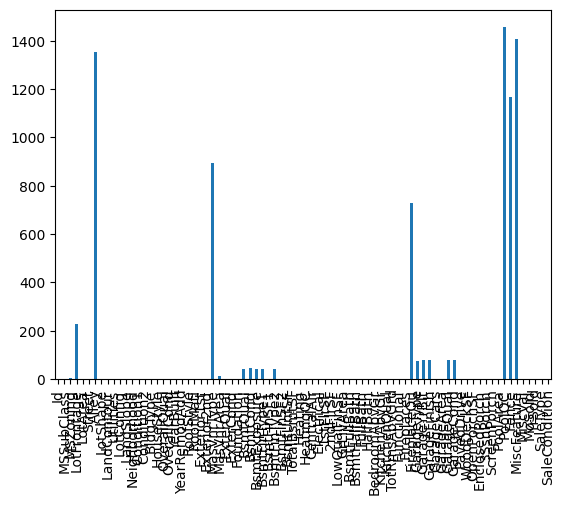

In [84]:
df1.isna().sum().plot(kind='bar')

In [85]:
for i in df1.columns:
    mn = df1[i].isna().sum()
    if mn < 600 and df1[i].dtype == 'object':
        df1[i] = df1[i].fillna(df1[i].mode()[0])
    elif mn < 600 and df1[i].dtype != 'object':
        df1[i] = df1[i].fillna(df1[i].mean())
    else:
        df1.drop(columns=i, inplace=True)

<Axes: >

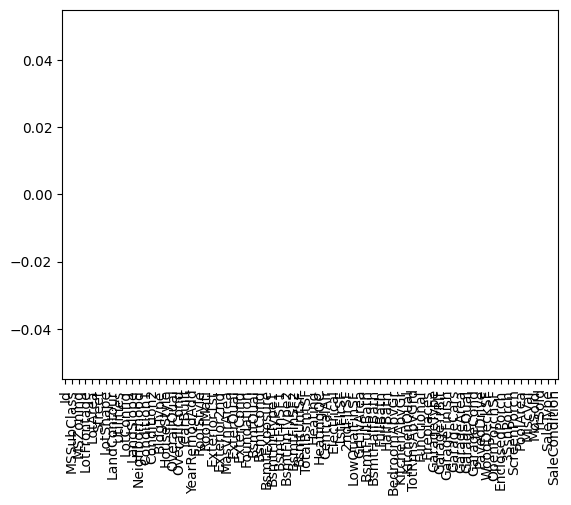

In [86]:
df1.isna().sum().plot(kind='bar')

Selecting same features as model

In [87]:
df2=df1[X.columns]

In [88]:
df2.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
   

Preprocessing

In [89]:
ncat=[]
ncon=[]
for i in df2.columns:
    if df2[i].dtypes==object:
        ncat.append(i)
    else:
        ncon.append(i)

In [90]:
df2cat=df2[ncat]
df2con=df2[ncon]

In [91]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [92]:
le=LabelEncoder()
ss=StandardScaler()

In [93]:
df2con=pd.DataFrame(ss.fit_transform(df2con),columns=ncon)

In [94]:
for i in df2cat.columns:
    df2cat[i]=le.fit_transform(df2cat[i])

In [95]:
df2=df2con.join(df2cat)

prediction on new data

In [96]:
pred=model.predict(df2)

In [97]:
pred

array([[127904.3062474 ],
       [174275.51180009],
       [183358.18239776],
       ...,
       [185155.51831272],
       [124838.07421253],
       [244845.7139591 ]])

creating new dataframe having id and saleprice predictions of house

In [98]:
df3=pd.DataFrame(df1['Id'],columns=['Id'])

In [99]:
df4=pd.DataFrame(pred,columns=['saleprice'])

In [100]:
df5=df3.join(df4)

prediction on test data

In [101]:
df5

,Id,saleprice
0,1461,127904.306247
1,1462,174275.511800
2,1463,183358.182398
3,1464,188355.237474
4,1465,175312.791187
...,...,...
1454,2915,63851.074732
1455,2916,55737.067258
1456,2917,185155.518313
1457,2918,124838.074213


In [102]:
df5['saleprice'].unique()

array([127904.3062474 , 174275.51180009, 183358.18239776, ...,
       185155.51831272, 124838.07421253, 244845.7139591 ])